## Is it a Disaster or Not? 
### Natural Language Processing    
#### Binary Text Classification

#### Class: MBD 2020, S2
#### Team Members:    
Karen Cendales    
Amritesh Palani 

###  Executive Summary

1. **Objective** In the need of real-time emergency communication, twitter has become a usefull tool to announce people a disaster, but it´s not always an easy task to identify  whether a person´s words are actually announcing a disaster or not. By using **Natural Language** techniques we will be able to clean, preprocess, perform feature engineering and evaluate different machine learning and deep learning algorithm to identify and isolete certain patterns to determine whether a tweet is annoucing a disaster or not.
2. **Dataset:** Using 10k tweets, where 7.6K have been manually labeled and 3.2k will be used as test data set. We will take 2k to validate our data. Repeated tweets with different target variable will be removed. We have identified some inconsistencies in the target variable for the same tweet which will be adressed.
3. **Representation:** The selected algorythm is  XXXXX, becuase XXXXX 
4. **Evaluation:** Initial accuracy was XX% and after applying feature transformation we achieved XX%.    


<html>
<img src="https://s3.amazonaws.com/lowres.cartoonstock.com/weather-tsunami-tidal_wave-silent_t-silent_letters-natural_disasters-bwhn723_low.jpg" width="20%">
</html>

### 2. Given.  
We are whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0.
#### Files:
train.csv - the training set
test.csv - the test set
sample_submission.csv - a sample submission file in the correct format
#### Columns:
id - a unique identifier for each tweet

text - the text of the tweet

location - the location the tweet was sent from (may be blank)

keyword - a particular keyword from the tweet (may be blank)

target - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)

### 3. Data Understanding. 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
train_df[train_df["target"] == 0]["text"].values[1]

'I love fruits'

In [6]:
train_df[train_df["target"] == 1]["text"].values[1]


'Forest fire near La Ronge Sask. Canada'

### 3. Data Cleaning. 

In [7]:
train_df['location'].isnull().sum()

2533

In [8]:
train_df['keyword'].isnull().sum()

61

In [9]:
train_df['text'].isnull().sum()

0

In [10]:
train_df['keyword'].fillna('',inplace=True)
train_df['keyword'] = train_df['keyword'].map(lambda x:x.replace('%20', ' '))
test_df['keyword'].fillna('',inplace=True)
test_df['keyword'] = test_df['keyword'].map(lambda x:x.replace('%20', ' '))

In [11]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove URLS, REMOVE links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [12]:
import re
import string
train_df['text'] = train_df['text'].apply(lambda x: clean_text(x))
test_df['text'] = test_df['text'].apply(lambda x: clean_text(x))

In [13]:
# APPLY FUNCTION TO REMOVE EMOJI

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

train_df['text'] = train_df['text'].apply(lambda x: remove_emoji(x))
test_df['text'] = test_df['text'].apply(lambda x: remove_emoji(x))

In [15]:
#SPELLING CORRECTION

!pip install pyspellchecker

In [ ]:
from spellchecker import SpellChecker

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)


train_df['text'] = train_df['text'].apply(lambda x: correct_spellings(x))

test_df['text'] = test_df['text'].apply(lambda x: correct_spellings(x))

In [83]:
#JUST AN EXAMPLE OF STEMMER AND LEMATIZER
import nltk
nltk.download('wordnet')

# Stemming and Lemmatization examples
text = "feet cats wolves talked"

tokenizer = nltk.tokenize.TreebankWordTokenizer()
tokens = tokenizer.tokenize(text)

# Stemmer
stemmer = nltk.stem.PorterStemmer()
print("Stemming the sentence: ", " ".join(stemmer.stem(token) for token in tokens))

# Lemmatizer
lemmatizer=nltk.stem.WordNetLemmatizer()
print("Lemmatizing the sentence: ", " ".join(lemmatizer.lemmatize(token) for token in tokens))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\karen\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


Stemming the sentence:  feet cat wolv talk
Lemmatizing the sentence:  foot cat wolf talked


In [13]:
train_df.isnull().sum()

id             0
keyword        0
location    2533
text           0
target         0
dtype: int64

In [14]:
train_df.head()

,id,keyword,location,text,target
0,1,,NaN,our deeds are the reason of this earthquake ma...,1
1,4,,NaN,forest fire near la ronge sask canada,1
2,5,,NaN,all residents asked to shelter in place are be...,1
3,6,,NaN,people receive wildfires evacuation orders in...,1
4,7,,NaN,just got sent this photo from ruby alaska as s...,1


In [15]:
import sys
print(sys.executable)

C:\Users\karen\Anaconda3\python.exe


In [16]:
#!C:/Users/karen/Anaconda3/python -m pip install wordcloud

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [18]:
#selecting column text as series and converting it into numpy array
train_df[train_df["target"] == 0].text.to_numpy()

array(['whats up man', 'i love fruits', 'summer is lovely', ...,
       'these boxes are ready to explode exploding kittens finally arrived gameofkittens explodingkittens\x89û ',
       'sirens everywhere',
       'i just heard a really loud bang and everyone is asleep great'],
      dtype=object)

In [19]:
# conveting from numpy array to list
a = train_df[train_df["target"] == 0].text.to_numpy().tolist()

In [20]:
a =  " ".join(a)

In [21]:
b = train_df[train_df["target"] == 1].text.to_numpy().tolist()
b = " ".join(b)
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
stopwords = list(ENGLISH_STOP_WORDS)

stopwords.append('http')  
stopwords.append('https')  
stopwords.append('CO')  
stopwords.append('û_')
a = WordCloud(stopwords=stopwords, background_color="white").generate(a)
b = WordCloud(stopwords=stopwords, background_color="white").generate(b)
a

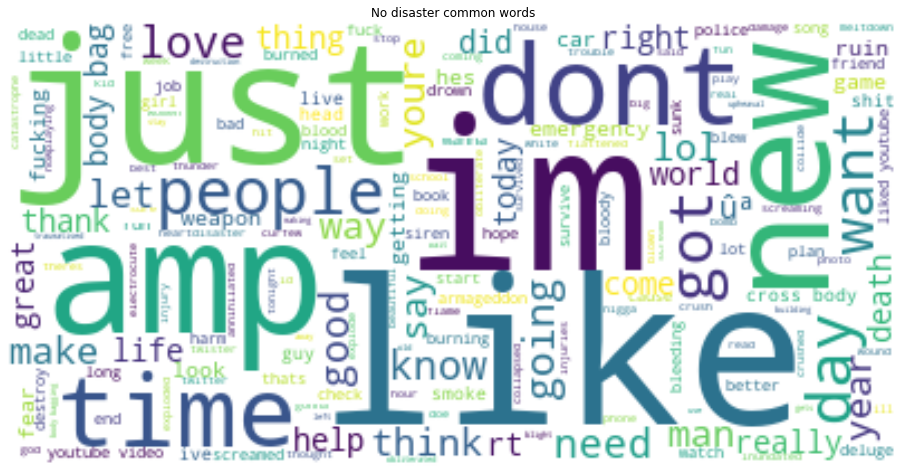

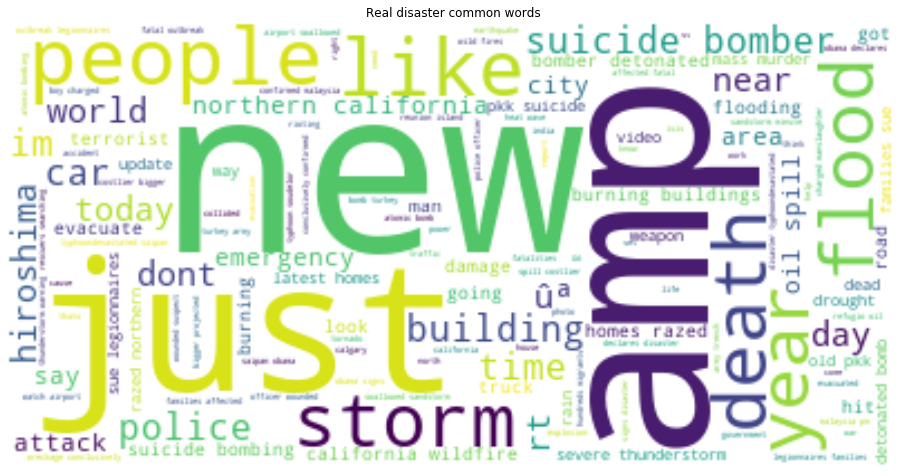

In [22]:
def show_word_cloud(cloud, title):
    plt.figure(figsize = (16, 10))
    plt.imshow(cloud, interpolation='bilinear')
    plt.title(title)
    plt.axis("off")
    plt.show();

show_word_cloud(a, "No disaster common words")
show_word_cloud(b, "Real disaster common words")

In [86]:
# REMOVE STOP WORDS

from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')


def remove_stopwords(text):
    """
    Removing stopwords belonging to english language
    
    """
    words = [w for w in text if w not in stopwords.words('english')]
    return words


train_df['text'] = train_df['text'].apply(lambda x : remove_stopwords(x))
test_df['text'] = test_df['text'].apply(lambda x : remove_stopwords(x))
train_df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karen\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
Exception ignored in: <function SeekableUnicodeStreamReader.__del__ at 0x00000169887BF288>
Traceback (most recent call last):
  File "C:\Users\karen\Anaconda3\lib\site-packages\nltk\data.py", line 1281, in __del__
    self.close()
  File "C:\Users\karen\Anaconda3\lib\site-packages\nltk\data.py", line 1310, in close
    self.stream.close()
KeyboardInterrupt


,id,keyword,location,text,target
0,1,,NaN,"[u, r, , e, e, , r, e, , h, e, , r, e, n, ...",1
1,4,,NaN,"[f, r, e, , f, r, e, , n, e, r, , l, , r, ...",1
2,5,,NaN,"[l, l, , r, e, e, n, , k, e, , , h, e, l, ...",1
3,6,,NaN,"[ , p, e, p, l, e, , r, e, c, e, v, e, , w, ...",1
4,7,,NaN,"[j, u, , g, , e, n, , h, , p, h, , f, r, ...",1


In [93]:
# After preprocessing, the text format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

train_df['text'] = train_df['text'].apply(lambda x : combine_text(x))
test_df['text'] = test_df['text'].apply(lambda x : combine_text(x))
train_df['text']
train_df.head()

,id,keyword,location,text,target
0,1,,NaN,u r e e r e h e r e n f h e r h ...,1
1,4,,NaN,f r e f r e n e r l r n g e k c n,1
2,5,,NaN,l l r e e n k e h e l e r n p l c ...,1
3,6,,NaN,p e p l e r e c e v e w l f r e e v c ...,1
4,7,,NaN,j u g e n h p h f r r u b l k ...,1


In [94]:
# TOKENIZEING PLAN B https://www.kaggle.com/parulpandey/getting-started-with-nlp-a-general-intro    text data preprocess section

# Tokenizing the training and the test set
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
train_df['text'] = train_df['text'].apply(lambda x: tokenizer.tokenize(x))
test_df['text'] = test_df['text'].apply(lambda x: tokenizer.tokenize(x))
train_df['text'].head()

0    [u, r, e, e, r, e, h, e, r, e, n, f, h, e, r, ...
1    [f, r, e, f, r, e, n, e, r, l, r, n, g, e, k, ...
2    [l, l, r, e, e, n, k, e, h, e, l, e, r, n, p, ...
3    [p, e, p, l, e, r, e, c, e, v, e, w, l, f, r, ...
4    [j, u, g, e, n, h, p, h, f, r, r, u, b, l, k, ...
Name: text, dtype: object

In [100]:
#  https://www.kaggle.com/parulpandey/getting-started-with-nlp-a-general-intro
def text_preprocessing(text):
    """
    Cleaning and parsing the text.

    """
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    
    nopunc = clean_text(text)
    tokenized_text = tokenizer.tokenize(nopunc)
    remove_stopwords = [w for w in tokenized_text if w not in stopwords.words('english')]
    combined_text = ' '.join(remove_stopwords)
    return combined_text

train_df['text'] = train_df['text'].apply(lambda x : text_preprocessing(x))
test_df['text'] = test_df['text'].apply(lambda x : text_preprocessing(x))
train_df['text']
train_df.head()

AttributeError: 'list' object has no attribute 'lower'

### 4. Data Pre-processing. 

#### Buliding Vectors/ Tokenization.

In [23]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

countvector = CountVectorizer(min_df=2,ngram_range=(1, 2), stop_words=stopwords)
vectorized_train = countvector.fit_transform(train_df['text'])

len(countvector.vocabulary_)

10479

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import StratifiedKFold,ShuffleSplit

In [67]:
count_vectorizer = feature_extraction.text.CountVectorizer()

## let's get counts for the first 5 tweets in the data
example_train_vectors = count_vectorizer.fit_transform(train_df["text"][0:5])

In [26]:
print(example_train_vectors[0].todense().shape)
print(example_train_vectors[0].todense())

(1, 52)
[[0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
  0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0]]


The above tells us that,there are 54 unique words (or "tokens") in the first five tweets.
The first tweet contains only some of those unique tokens - all of the non-zero counts above are the tokens that DO exist in the first tweet.
Now let's create vectors for all of our tweets.

In [27]:
train_vectors = count_vectorizer.fit_transform(train_df["text"])

## note that we're NOT using .fit_transform() here. Using just .transform() makes sure
# that the tokens in the train vectors are the only ones mapped to the test vectors - 
# i.e. that the train and test vectors use the same set of tokens.
test_vectors = count_vectorizer.transform(test_df["text"])

In [77]:
import CMUTweetTagger
print CMUTweetTagger.runtagger_parse("train_df")
#text = nltk.word_tokenize("train_df")
#train_df


SyntaxError: invalid syntax (<ipython-input-77-46f62eb0f809>, line 2)

#### 4.1 POS Tagging.

In [106]:
from nltk import AffixTagger
from nltk import DefaultTagger
AffixRegexp = AffixTagger(train_df, backoff=DefaultTagger('NOUN'))
#AffixRegexp.evaluate(brown_test)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

#### 4.2 Parsing. 

#### 4.3 N-grams. 

### 5. Modeling.

#### 5.1 Building a baseline model- Linear ridge classifier. 

As we mentioned above, we think the words contained in each tweet are a good indicator of whether they're about a real disaster or not. The presence of particular word (or set of words) in a tweet might link directly to whether or not that tweet is real.

What we're assuming here is a linear connection. So let's build a linear model and see!

In [28]:
## Our vectors are really big, so we want to push our model's weights
## toward 0 without completely discounting different words - ridge regression 
## is a good way to do this.
clf = linear_model.RidgeClassifier()

In [29]:
scores = model_selection.cross_val_score(clf, train_vectors, train_df["target"], cv=3, scoring="f1")
scores

array([0.61791967, 0.55686275, 0.62271415])

The above scores aren't terrible! It looks like our assumption will score roughly 0.65 on the leaderboard. There are lots of ways to potentially improve on this (TFIDF, LSA, LSTM / RNNs, the list is long!), we will try them in the later sets of code. 

In the meantime, let's do predictions on our training set and build a submission for the competition.

In [30]:
clf.fit(train_vectors, train_df["target"])

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

#### Scoring. 

In [31]:
scores = {}

cv = StratifiedKFold(n_splits=5)
scores["Stratifid K Fold"] = cross_val_score(LogisticRegression(),vectorized_train , train_df["target"],scoring="f1", cv=cv)
scores["Stratifid K Fold"] = np.mean(scores["Stratifid K Fold"])

C:\Users\karen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [32]:
cv = ShuffleSplit(n_splits =5, test_size = 0.2,random_state=0)
scores["Shuffle Split"] = cross_val_score(LogisticRegression(),vectorized_train , train_df["target"],scoring="f1", cv=cv)
scores["Shuffle Split"] = np.mean(scores["Shuffle Split"])

In [33]:
scores

{'Stratifid K Fold': 0.5754145541911899, 'Shuffle Split': 0.754078135148714}

#### 5.3 SVM as a classifier.

In [34]:
cv = ShuffleSplit(n_splits =5, test_size = 0.2,random_state=0)
scores["Shuffle Split with svm"] = cross_val_score(svm.SVC(),vectorized_train , train_df["target"],scoring="f1", cv=cv)
scores["Shuffle Split with svm"] = np.mean(scores["Shuffle Split with svm"])

C:\Users\karen\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\karen\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\karen\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\karen\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to n

In [35]:
scores

{'Stratifid K Fold': 0.5754145541911899,
 'Shuffle Split': 0.754078135148714,
 'Shuffle Split with svm': 0.0}

#### TD-IF weighting

In [36]:
countvector = TfidfVectorizer(min_df=2,ngram_range=(1, 2), stop_words=stopwords)
vectorized_train = countvector.fit_transform(train_df['text'])
len(countvector.vocabulary_)

10479

#### k-fold CV

In [37]:
cv = StratifiedKFold(n_splits=5)
scores["Stratifid K Fold with tfidf"] = cross_val_score(LogisticRegression(),vectorized_train , train_df["target"],scoring="f1", cv=cv)
scores["Stratifid K Fold with tfidf"] = np.mean(scores["Stratifid K Fold with tfidf"])

C:\Users\karen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
scores

{'Stratifid K Fold': 0.5754145541911899,
 'Shuffle Split': 0.754078135148714,
 'Shuffle Split with svm': 0.0,
 'Stratifid K Fold with tfidf': 0.5354693818787158}

In [39]:
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state =0)
scores["Shuffle split with tfidf"] = cross_val_score(LogisticRegression(),vectorized_train , train_df["target"],scoring="f1", cv=cv)
scores["Shuffle split with tfidf"] = np.mean(scores["Shuffle split with tfidf"])

In [40]:
scores

{'Stratifid K Fold': 0.5754145541911899,
 'Shuffle Split': 0.754078135148714,
 'Shuffle Split with svm': 0.0,
 'Stratifid K Fold with tfidf': 0.5354693818787158,
 'Shuffle split with tfidf': 0.7498349054976279}

#### Logistic regression as a text classifier.

In [41]:
from sklearn.metrics import f1_score
clf = LogisticRegression()
clf.fit(vectorized_train , train_df["target"])
predicted = clf.predict(vectorized_train)
scores["logistic regression without cross validation over tfidf"] = f1_score(predicted,train_df["target"])

In [42]:
scores

{'Stratifid K Fold': 0.5754145541911899,
 'Shuffle Split': 0.754078135148714,
 'Shuffle Split with svm': 0.0,
 'Stratifid K Fold with tfidf': 0.5354693818787158,
 'Shuffle split with tfidf': 0.7498349054976279,
 'logistic regression without cross validation over tfidf': 0.8452121415394935}

#### Additional Models with cross-overs.

In [43]:
clf =svm.SVC()
clf.fit(vectorized_train , train_df["target"])
predicted = clf.predict(vectorized_train)
scores["svm without cross validation over tfidf"] = f1_score(predicted,train_df["target"])

C:\Users\karen\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\karen\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


In [44]:
scores

{'Stratifid K Fold': 0.5754145541911899,
 'Shuffle Split': 0.754078135148714,
 'Shuffle Split with svm': 0.0,
 'Stratifid K Fold with tfidf': 0.5354693818787158,
 'Shuffle split with tfidf': 0.7498349054976279,
 'logistic regression without cross validation over tfidf': 0.8452121415394935,
 'svm without cross validation over tfidf': 0.0}

In [45]:
countvector = CountVectorizer(min_df=2,ngram_range=(1, 2), stop_words=stopwords)
vectorized_train = countvector.fit_transform(train_df['text'])
len(countvector.vocabulary_)

10479

In [46]:
clf = LogisticRegression()
clf.fit(vectorized_train , train_df["target"])
predicted = clf.predict(vectorized_train)
scores["logistic regression without cross validation over cv"] = f1_score(predicted,train_df["target"])

C:\Users\karen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [47]:
scores

{'Stratifid K Fold': 0.5754145541911899,
 'Shuffle Split': 0.754078135148714,
 'Shuffle Split with svm': 0.0,
 'Stratifid K Fold with tfidf': 0.5354693818787158,
 'Shuffle split with tfidf': 0.7498349054976279,
 'logistic regression without cross validation over tfidf': 0.8452121415394935,
 'svm without cross validation over tfidf': 0.0,
 'logistic regression without cross validation over cv': 0.9131978057437883}

In [48]:
clf =svm.SVC()
clf.fit(vectorized_train , train_df["target"])
predicted = clf.predict(vectorized_train)
scores["svm without cross validation over cv"] = f1_score(predicted,train_df["target"])

C:\Users\karen\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\karen\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


In [49]:
scores

{'Stratifid K Fold': 0.5754145541911899,
 'Shuffle Split': 0.754078135148714,
 'Shuffle Split with svm': 0.0,
 'Stratifid K Fold with tfidf': 0.5354693818787158,
 'Shuffle split with tfidf': 0.7498349054976279,
 'logistic regression without cross validation over tfidf': 0.8452121415394935,
 'svm without cross validation over tfidf': 0.0,
 'logistic regression without cross validation over cv': 0.9131978057437883,
 'svm without cross validation over cv': 0.0}

In [50]:
len(countvector.vocabulary_)

10479

In [51]:
vectorized_test = countvector.transform(test_df['text'])

In [52]:
clf = svm.SVC()
clf.fit(vectorized_train,train_df['target'])
predicted = clf.predict(vectorized_test)

C:\Users\karen\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### 5.2 Naive-Bayes.

### Final Results. 

In [53]:
scores

{'Stratifid K Fold': 0.5754145541911899,
 'Shuffle Split': 0.754078135148714,
 'Shuffle Split with svm': 0.0,
 'Stratifid K Fold with tfidf': 0.5354693818787158,
 'Shuffle split with tfidf': 0.7498349054976279,
 'logistic regression without cross validation over tfidf': 0.8452121415394935,
 'svm without cross validation over tfidf': 0.0,
 'logistic regression without cross validation over cv': 0.9131978057437883,
 'svm without cross validation over cv': 0.0}

### Exctracting Output.  

In [54]:
#submission_df = pd.read_csv("sample_submission.csv")

In [55]:
#submission_df['target'] = predicted
#submission_df.to_csv("Submitted.csv",index=False,header = True)

In [56]:
#submission_df.head()